<a href="https://colab.research.google.com/github/VijayaKrishnanV/PCOS-Detection/blob/main/PCOS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing all the libraries that I use in this project
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

In [ ]:
#Loding data into the kernels

file_path_with_infertility="/content/PCOS_infertility.csv"
file_path_without_infertility="/content/PCOS_data_without_infertility.xlsx"

PCOS_inf = pd.read_csv(file_path_with_infertility)
PCOS_woinf = pd.read_excel(file_path_without_infertility, sheet_name="Full_new")


In [ ]:
#Merging the two files as per patient file no.
#The files were sorted into two based on patients with infertility and without infertility
data = pd.merge(PCOS_woinf, PCOS_inf, on='Patient File No.', suffixes=('', '_y'), how='left')

In [ ]:
#Dropping the repeated features after merging
data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

In [ ]:
#Taking a look at the dataset
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
#Having a look at the data with dtype objects
data["AMH(ng/mL)"].head()

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [ ]:
#Similarly
data["II    beta-HCG(mIU/mL)"].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II    beta-HCG(mIU/mL), dtype: object

In [ ]:
#Dealing with categorical values.
#In this database the type objects are numeric values saved as strings.
#So I am just converting it into a numeric value.

data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')


In [ ]:
#Clearing up the extra space in the column names (optional)

data.columns = [col.strip() for col in data.columns]

In [ ]:
# Having a look at some basic statistical details.

data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


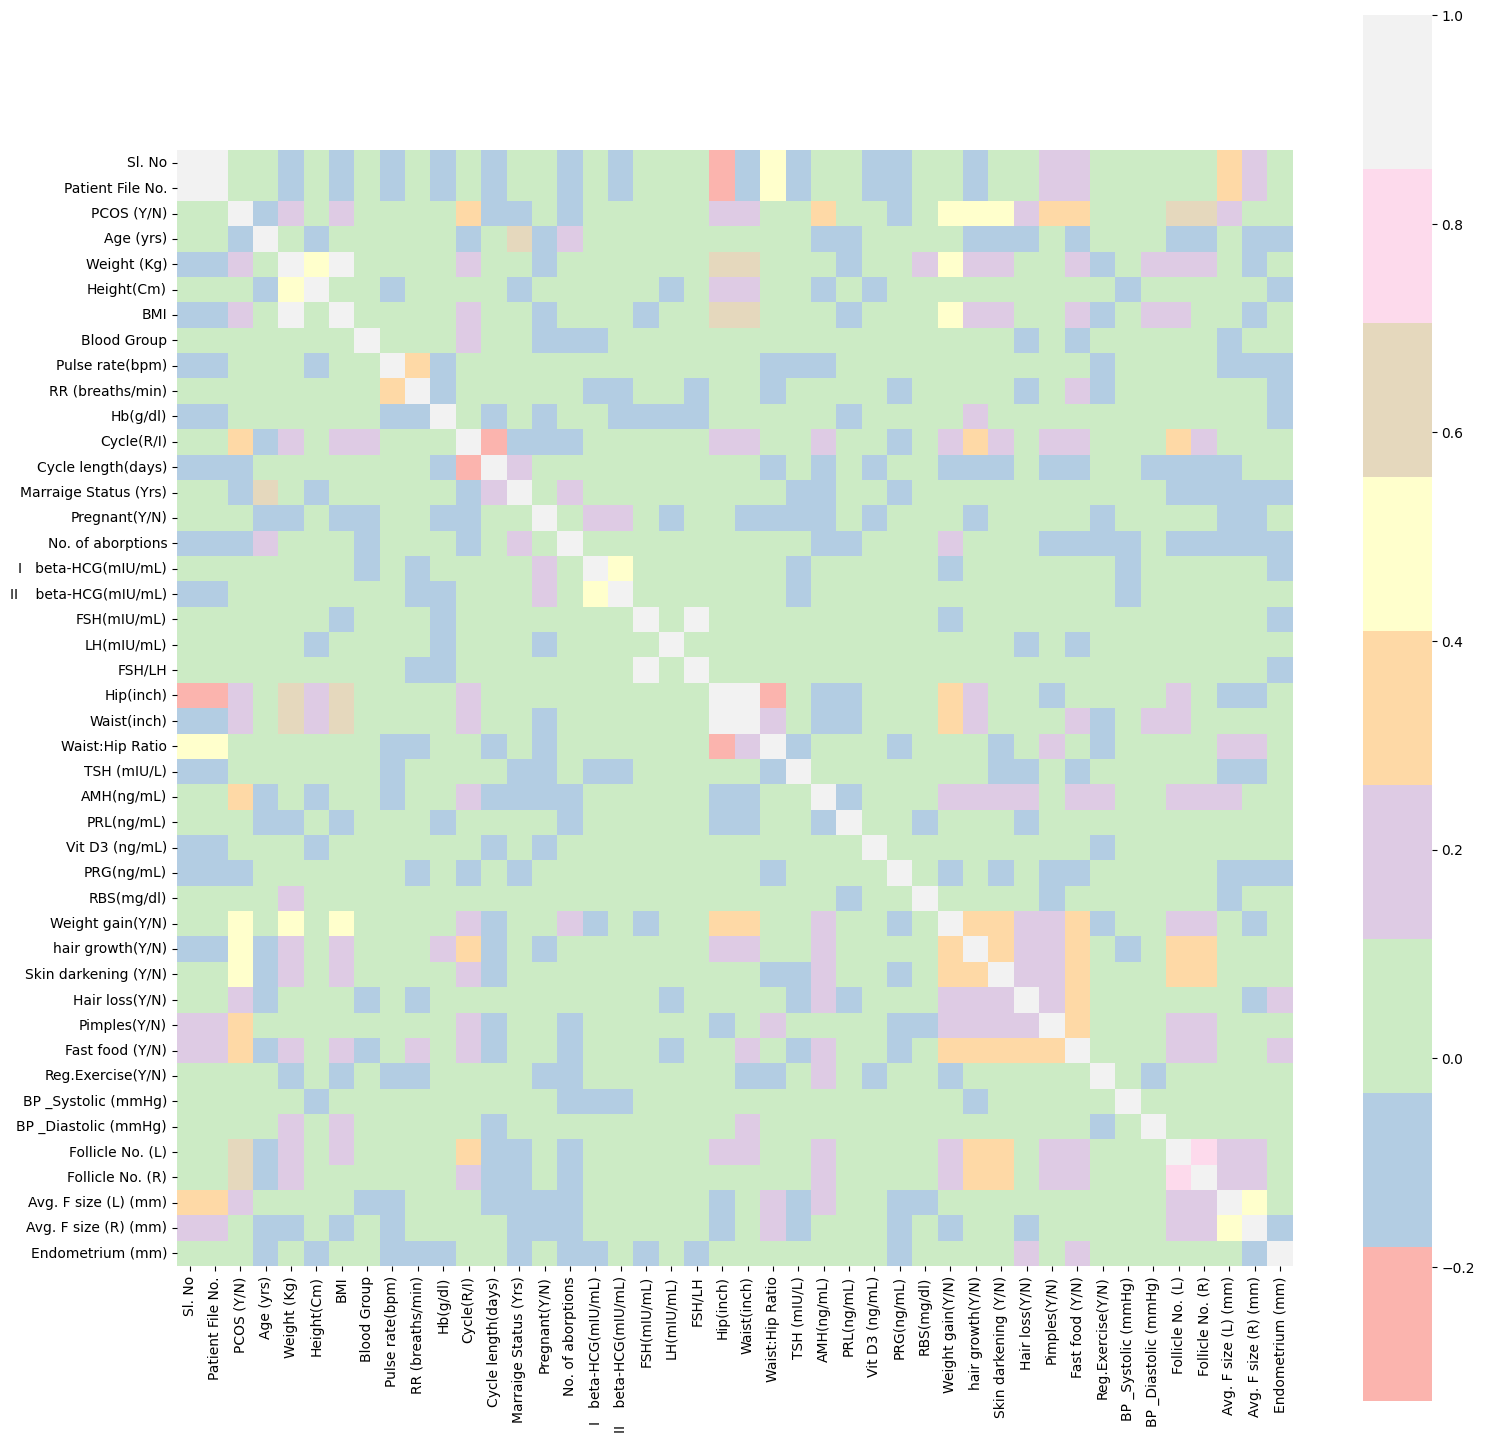

In [ ]:
#Examaning a correlation matrix of all the features

corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

In [ ]:
#How all the features correlate with the PCOS

corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.377933
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.263863
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.          0.060998
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)    

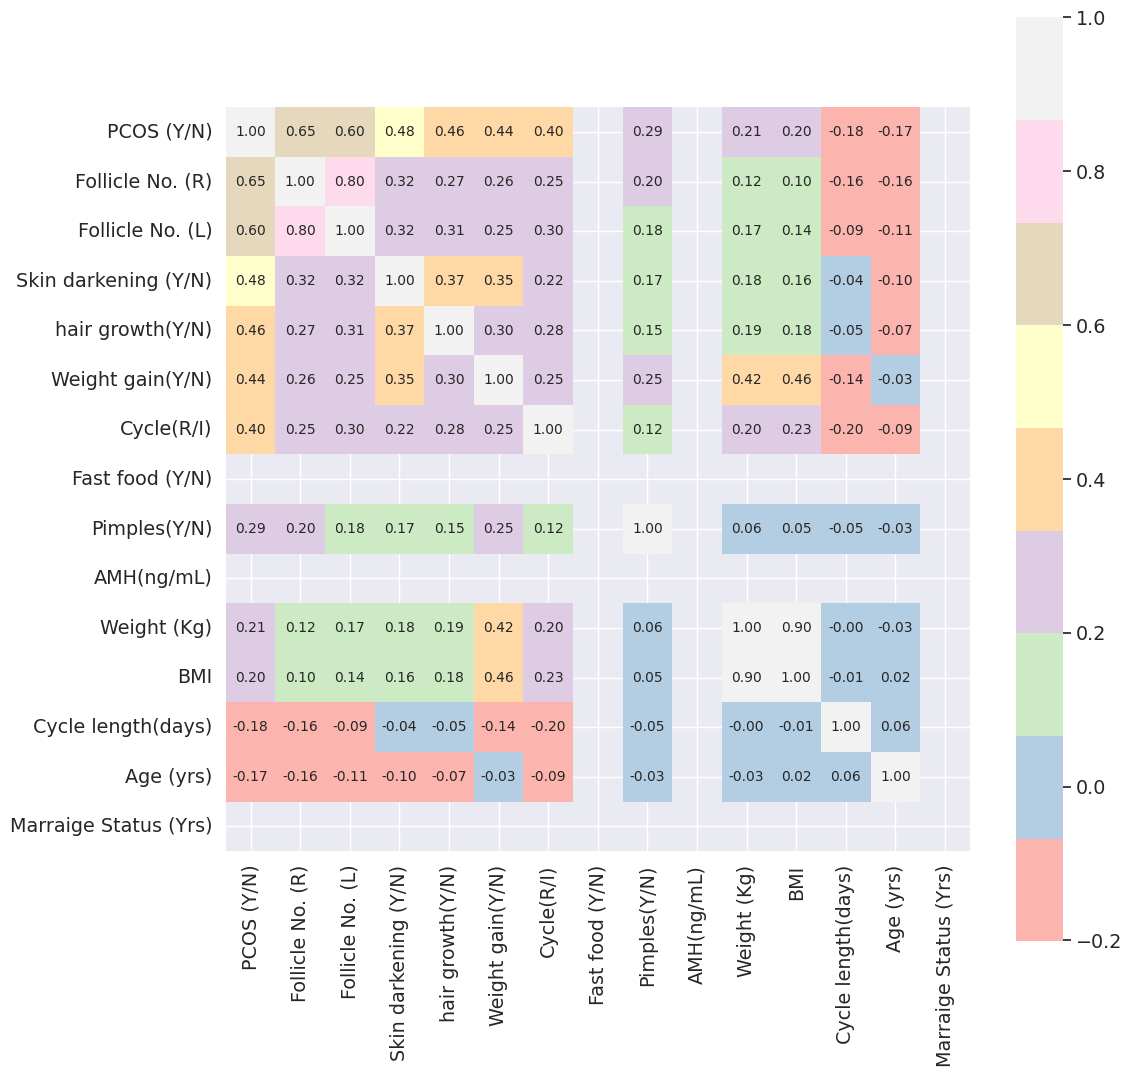

In [ ]:
#Having a look at features bearing significant correlation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n)

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#Assiging the features (X)and target(y)

X=data.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 1) #droping out index from features too
y=data["PCOS (Y/N)"]


In [ ]:
#Splitting the data into test and training sets

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
# Import the SimpleImputer class
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object
imputer = SimpleImputer(strategy="median")

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform the training and test data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Fit the RandomForestClassifier to the preprocessed data
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Making prediction and checking the test set

pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.8773006134969326


In [ ]:
#Building a dictionalry with list of optional values that will me analyesed by GridSearch CV

parameters = {
    'n_estimators': [100,150, 200,500,700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10,12],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]
}

In [ ]:
#Fitting the trainingset to find parameters with best accuracy

CV_rfc = GridSearchCV(estimator=rfc, param_grid=parameters, cv= 2)
CV_rfc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [ ]:
#Getting the outcome of gridsearch

CV_rfc.best_params_
#Fitting the model with selected parameters

rfc1=RandomForestClassifier(**CV_rfc.best_params_)
rfc1.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=9, max_features='auto')

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       112
           1       0.91      0.78      0.84        51

    accuracy                           0.91       163
   macro avg       0.91      0.87      0.89       163
weighted avg       0.91      0.91      0.91       163



<Axes: >

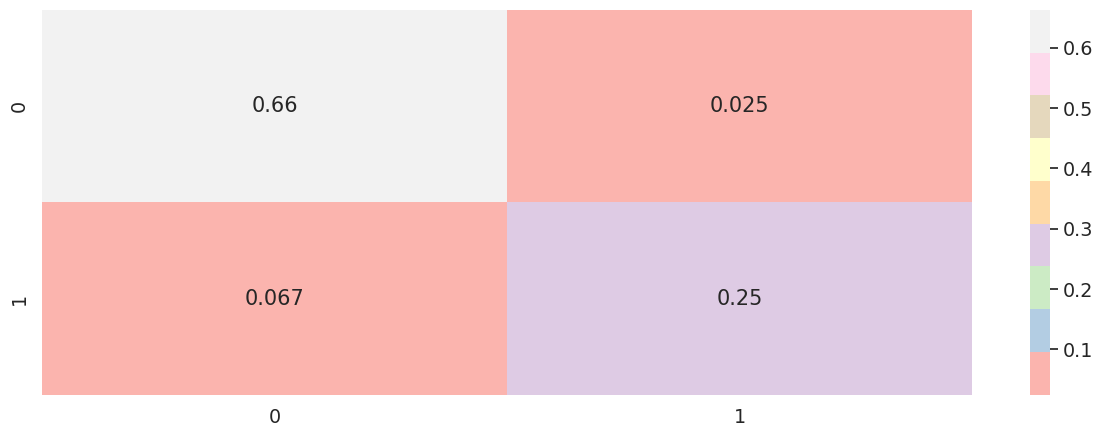

In [ ]:
#Testing the Model on test set

predictions=rfc1.predict(X_test)
acccuracy_final = accuracy_score(y_test,predictions)

acccuracy_final
classi_report = classification_report(y_test, predictions)
print(classi_report)
# cofusion matrix
plt.subplots(figsize=(15,5))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':15}, cmap = 'Pastel1')

In [ ]:
# prompt: confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the confusion matrix
cm = confusion_matrix(y_test, predictions)

cm

array([[108,   4],
       [ 11,  40]])

In [ ]:
# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Additional evaluation metrics
print(classification_report(y_test, predictions))

Accuracy: 0.9079754601226994
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       112
           1       0.91      0.78      0.84        51

    accuracy                           0.91       163
   macro avg       0.91      0.87      0.89       163
weighted avg       0.91      0.91      0.91       163



In [ ]:
from itertools import cycle
# prompt: generate a code to take in input values and provide output

age = float(input("Enter age (yrs): "))
weight = float(input("Enter weight (Kg): "))
Height = float(input("Enter the height in (cm)"))
bmi = float(input("Enter BMI: "))
blood_group = float(input("enter your blood group"))
pulse_rate = float(input("Enter your pulse rate"))
RR = float(input("Enter your rr per sec"))
hb = float(input("Enter Hb(g/dl): "))
cycle_r = float(input("Enter your cycle"))
cycle_length = float(input("Enter cycle length(days): "))
marrage_status =float(input("married ?:"))
pregnant = float(input("Pregnant:"))
abortions = float(input("No of abortions:"))
beta_1 = float(input("Enter your beta_1"))
beta_2 = float(input("Enter your beta_2"))
Fsh = float(input("Enter your fsh"))
lh = float(input("Enter LH(mIU/mL): "))
fsh_2 = float(input("enter fsh 2:"))
hip = float(input("hip size in inches:"))
waist = float(input("waist size in inches"))
waistratio = float(input("enter the waist to hip ratio:"))
tsh = float(input("Enter TSH(mIU/mL): "))
amh = float(input("Enter AMH(ng/mL): "))
prolactin = float(input("Enter Prolactin(ng/mL): "))
vit_d = float(input("Enter vitd3(ng/mL): "))
prg = float(input("Enter Prg(ng/mL): "))
RBS = float(input("Enter RBS(mg/dl): "))
weight_gain = float(input("weight gain(Y/N): "))
hair_growth = float(input("hair growth(y/n):"))
skin_drakening = float(input("skin darkening(Y/N): "))
hair_loss = float(input("hair loss(y/n): "))
pimpels = float(input("pimpels(y/n):"))
fast_food = float(input("eats fast food(y/n)): "))
reg_exc = float(input("dose reg excersise(y/n): "))
BP_systolic = float(input("Enter bp sustolic: "))
bp_diastolic = float(input("Enter bp diastolic "))
follicle_l = float(input("Enter Follicle No. (L): "))
follicle_r = float(input("Enter Follicle No. (R): "))
avgf_l = float(input("Enter avgf left: "))
avgf_r = float(input("Enter avgf right: "))
endometrium = float(input("Enter endometrium (mm): "))


# Create a new data point with the user input
new_data_point = [age,weight,Height,bmi,blood_group,pulse_rate,RR,hb,cycle_r,cycle_length,marrage_status,pregnant,abortions,beta_1,beta_2,Fsh,lh,fsh_2,hip,waist,waistratio,tsh,amh,prolactin,vit_d,prg,RBS,weight_gain,hair_growth,skin_drakening,hair_loss,pimpels,fast_food,reg_exc,BP_systolic,bp_diastolic,follicle_l,follicle_r,avgf_l,avgf_r,endometrium]

# Convert the new data point to a NumPy array
new_data_point_array = np.asarray(new_data_point)

# Reshape the array to match the training data format
new_data_point_reshaped = new_data_point_array.reshape(1, -1)

# Make a prediction using the trained model
prediction = rfc1.predict(new_data_point_reshaped)

# Print the prediction
if prediction[0] == 1:
  print("The patient is predicted to have PCOS.")
else:
  print("The patient is predicted to not have PCOS.")


<ipython-input-40-fc36f5f697e1>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=height, palette='Pastel1')


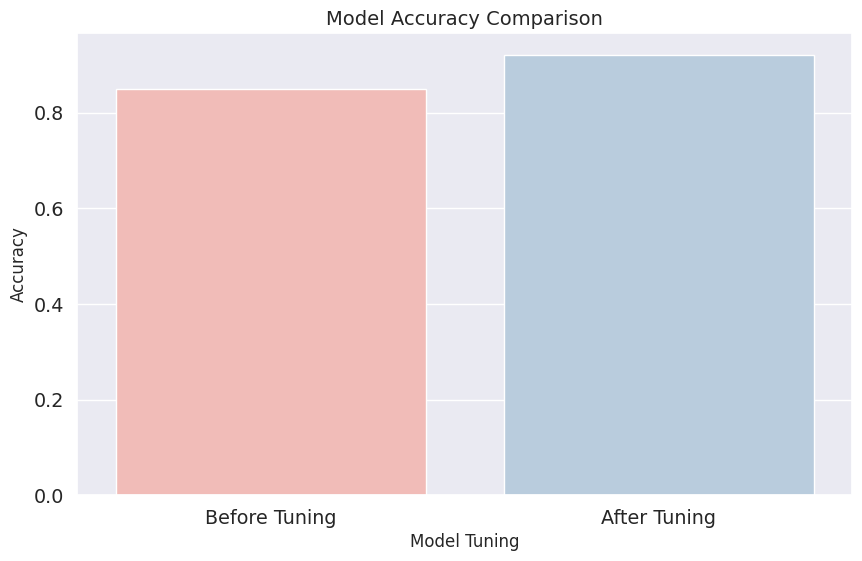

In [ ]:
# prompt: bar graphs for comparing the accuracy

import matplotlib.pyplot as plt
import seaborn as sns

# Define the x-axis labels
labels = ['Before Tuning', 'After Tuning']

# Define the accuracy values
accuracy_before = 0.85  # Replace with actual value
accuracy_after = 0.92  # Replace with actual value

# Define the bar heights
height = [accuracy_before, accuracy_after]

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=height, palette='Pastel1')

# Add labels and title
plt.xlabel('Model Tuning', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)

# Display the bar chart
plt.show()
